# Imports

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Environment

In [2]:
grid_world = np.array([
    [0,  0,  0, -1],
    [0, -1,  0, -1],
    [0,  0,  0,  0],
    [0, -1, -1,  10]
])

# Constants

In [20]:
n_rows, n_cols = grid_world.shape

V = np.zeros((n_rows, n_cols))

actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']

gamma = 0.9

delta = float('inf')

# Dynamic programming

In [21]:
while delta > 0.001:
    delta = 0
    for i in range(n_rows):
        for j in range(n_cols):
            if grid_world[i, j] == 0:
            
                action_returns = []
                for action in actions:
                    if action == 'UP':
                        next_state = max(i - 1, 0), j
                    elif action == 'DOWN':
                        next_state = min(i + 1, n_rows - 1), j
                    elif action == 'LEFT':
                        next_state = i, max(j - 1, 0)
                    elif action == 'RIGHT':
                        next_state = i, min(j + 1, n_cols - 1)

                    action_returns.append(grid_world[next_state] + gamma * V[next_state])

                new_v = max(action_returns)
                delta = max(delta, abs(new_v - V[i, j]))
                V[i, j] = new_v

# Plotting State-Value 

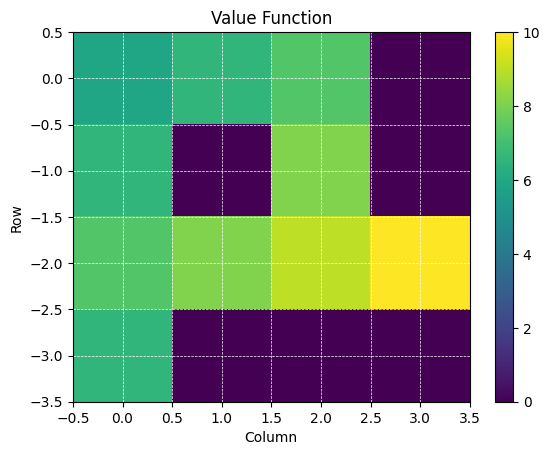

In [38]:
x = np.arange(V.shape[1])
y = np.arange(V.shape[0])

X, Y = np.meshgrid(x, y)

plt.pcolor(X, -Y, V, cmap='viridis')
plt.colorbar()

plt.grid(True, linestyle='--', linewidth=0.5, color='white')

plt.xlabel('Column')
plt.ylabel('Row')

plt.title('Value Function')

plt.show()